In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
def f(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def df(x):
    x1, x2 = x
    dx1 = -400 * (x2 - x1**2) * x1 - 2 * (1 - x1) 
    dx2 = 200 * (x2 - x1**2)
    return np.array([dx1, dx2])

x0_a = np.array([1.2, 1.2])
x0_b = np.array([-1.2, 1.])

def armiho(xk, alpha, eps = 0.01):
    while f(xk - alpha * df(xk)) - f(xk) > eps * alpha * df(xk) @ df(xk):
        alpha *= 0.5
    return alpha

def gd(x0, alpha = 0.05):
    xk = x0.copy()
    x_prev = None
    y_hist = []
    step_hist = []
    while x_prev is None or abs(f(xk) - f(x_prev)) / f(xk) > 0.0000001:
        x_prev = xk.copy()
        cur_alpha = armiho(xk, alpha)
        step_hist.append(np.sqrt(np.sum((cur_alpha * df(xk))**2)))
        xk -= cur_alpha * df(xk)
        y_hist.append(f(xk))

    return xk, y_hist, step_hist

In [47]:
xk_a, y_hist_a, step_hist_a = gd(x0_a)
xk_b, y_hist_b, step_hist_b = gd(x0_b)

In [48]:
print(xk_a, xk_b)

[1. 1.] [1.00002256 1.00004535]


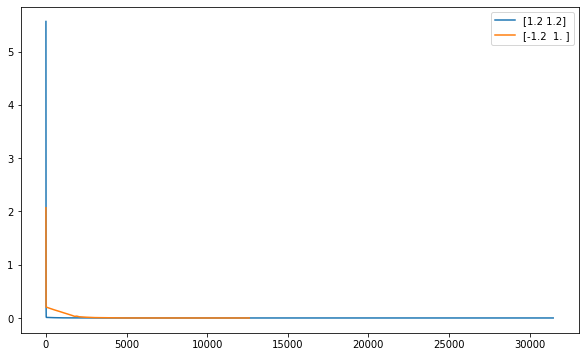

In [49]:
plt.figure(figsize=(10, 6))

plt.plot(y_hist_a, label=f"{x0_a}")
plt.plot(y_hist_b, label=f"{x0_b}")

plt.legend()

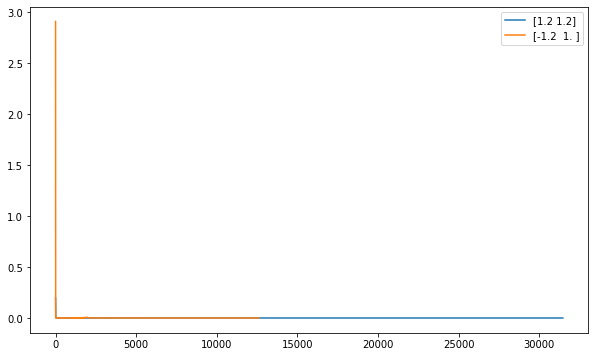

In [50]:
plt.figure(figsize=(10, 6))

plt.plot(step_hist_a, label=f"{x0_a}")
plt.plot(step_hist_b, label=f"{x0_b}")

plt.legend()